### Visualize

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('data/tweet_data.csv')
df.meslek.fillna('serbest', inplace=True)

df_user = pd.read_csv('data/tweet_data.csv', usecols=['username',
           'realname','meslek', 'age_group',
           'age_enc', 'gender', 'gender_enc']).drop_duplicates()
df_user.meslek.fillna('serbest', inplace=True)

In [55]:
prof_mapper = pd.read_excel("data/profession_map.xlsx", engine="openpyxl")

In [56]:
df_user = df_user.merge(prof_mapper, on="meslek")

No handles with labels found to put in legend.


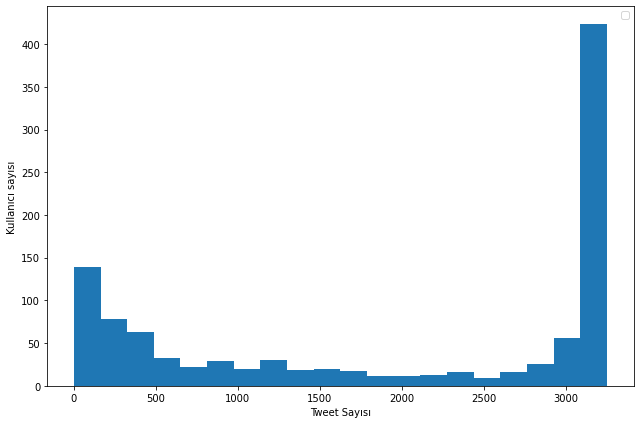

In [29]:
#Kullanıcıların attığı toplam tweet sayısının histogramı
fig, ax = plt.subplots(figsize=(9, 6))

serie = df.username.value_counts()
ax.hist(serie, bins=20)

ax.set_ylabel('Kullanıcı sayısı')
ax.set_xlabel('Tweet Sayısı')
# ax.set_title('Histogram of total number of tweets per user')
ax.set_xticks(np.arange(max(serie), step=500))

ax.legend()
    
fig.tight_layout()

plt.show()

In [36]:
hist = ax.hist(serie, bins=20)

plist = list()
for key, value in zip(hist[1], hist[0]):
    plist.append((int(key), value))

sorted(plist, key=lambda x: x[0])

No handles with labels found to put in legend.


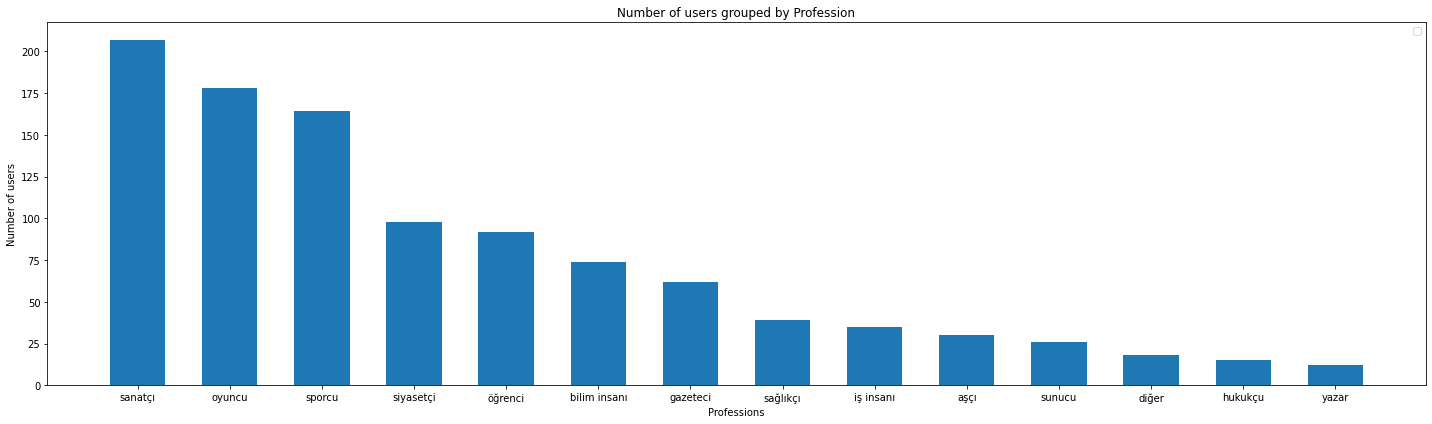

In [45]:
# Meslek dağılımı
fig, ax = plt.subplots(figsize=(20, 6))

labels = df_user.meslek2.value_counts(ascending=False).keys()
means = df_user.meslek2.value_counts(ascending=False).values

x = np.arange(len(labels))  # the label locations
width = 0.60  # the width of the bars

ax.bar(labels, means, width)

ax.set_ylabel('Number of users')
ax.set_xlabel('Professions')
ax.set_title('Number of users grouped by Profession')
# ax.set_xticks(np.arange(max(serie), step=500))

ax.legend()
    
fig.tight_layout()

plt.show()

No handles with labels found to put in legend.


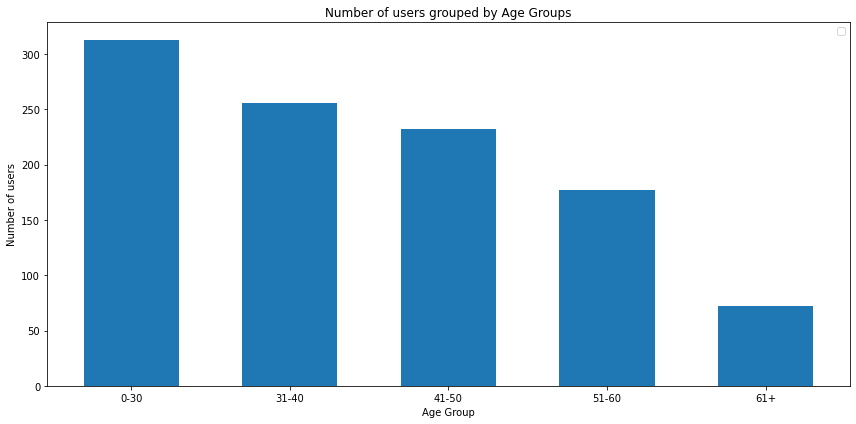

In [5]:
# Yaş grubu dağılımı

fig, ax = plt.subplots(figsize=(12, 6))

labels = df_user.age_group.value_counts().keys()
means = df_user.age_group.value_counts().values

x = np.arange(len(labels))  # the label locations
width = 0.60  # the width of the bars

ax.bar(labels, means, width)

ax.set_ylabel('Number of users')
ax.set_xlabel('Age Group')
ax.set_title('Number of users grouped by Age Groups')
# ax.set_xticks(np.arange(max(serie), step=500))

ax.legend()
    
fig.tight_layout()

plt.show()

In [6]:
# fig, ax = plt.subplots(figsize=(18, 15))

# labels = sorted(df_user.age_group.unique().tolist()) # meslek

# for c, meslek in enumerate(df_user.meslek.unique()): # label

#     df_part = df_user[df_user["meslek"] == meslek]
#     y_labels = [df_part[df_part["age_group"] == label].shape[0] for label in labels]
    
#     x = np.arange(len(labels))  # the label locations
#     width = 0.2  # the width of the bars
    
#     rects = ax.bar(x +  c*10 * width/len(labels), y_labels, width, label=meslek)
#     ax.bar_label(rects, padding=3)

# ax.set_ylabel('')
# ax.set_title('')
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.legend()
    
# fig.tight_layout()

# plt.show()

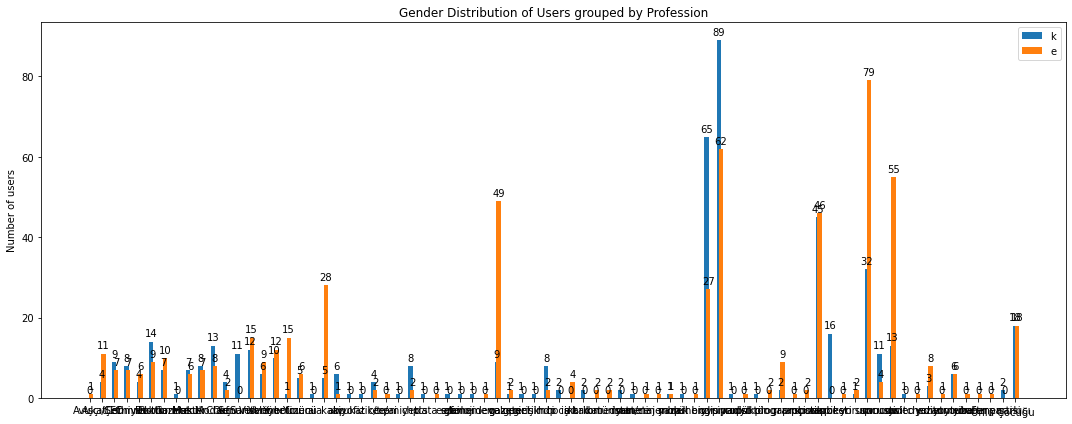

In [7]:
# Erkek - Kadın Dağılımı

fig, ax = plt.subplots(figsize=(15, 6))

labels = sorted(df_user.meslek2.unique().tolist())

for c, gender in enumerate(df_user.gender.unique()): # gender

    df_part = df_user[df_user["gender"] == gender]
    y_labels = [df_part[df_part["meslek2"] == label].shape[0] for label in labels]
    
    x = np.arange(len(labels))  # the label locations2
    width = 0.35  # the width of the barsm
    
    rects = ax.bar(x + c*30* width/len(labels), y_labels, width, label=gender)
    ax.bar_label(rects, padding=3)

ax.set_ylabel('Number of users')
ax.set_title('Gender Distribution of Users grouped by Profession')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
    
fig.tight_layout()

plt.show()

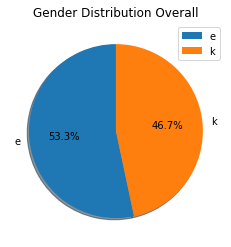

In [8]:
labels = df_user.gender.value_counts().keys()
counts = df_user.gender.value_counts().values

fig, ax = plt.subplots()
ax.set_title('Gender Distribution Overall')
ax.pie(counts, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.legend()
plt.show()

### Paper Şekil 2

In [80]:
meslekler = df_user.meslek2.value_counts().keys()

dict_e = dict(df_user[df_user["gender"] == "e"].groupby(["meslek2"])["gender"].count())
dict_k = dict(df_user[df_user["gender"] == "k"].groupby(["meslek2"])["gender"].count())

dict_0_30 = dict(df_user[df_user["age_group"] == "0-30"].groupby(["meslek2"])["age_group"].count())
dict_31_40 = dict(df_user[df_user["age_group"] == "31-40"].groupby(["meslek2"])["age_group"].count())
dict_41_50 = dict(df_user[df_user["age_group"] == "41-50"].groupby(["meslek2"])["age_group"].count())
dict_51_60 = dict(df_user[df_user["age_group"] == "51-60"].groupby(["meslek2"])["age_group"].count())
dict_61_ = dict(df_user[df_user["age_group"] == "61+"].groupby(["meslek2"])["age_group"].count())

for meslek in meslekler:
    try:
        print((meslek, dict_k[meslek]))
    except:
        print((meslek, 0))

('sanatçı', 97)
('oyuncu', 101)
('sporcu', 56)
('siyasetçi', 36)
('öğrenci', 65)
('bilim insanı', 28)
('diğer', 42)
('gazeteci', 11)
('sağlıkçı', 21)
('iş insanı', 21)
('aşçı', 12)


### Confusion Matrix

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix

In [ ]:
problem_name = "gender"

train= pd.read_csv(f"data/train_{problem_name}.csv")
test = pd.read_csv(f"data/test_{problem_name}.csv")

data = train.append(test)
data = data[data["label"]!=5]
data_texts = data.sentence1
data_labels = data.label


_, _, _, test_labels = train_test_split(data_texts, data_labels, shuffle=True, test_size = 0.20, random_state=26)
preds = pd.read_csv(f"predictions/preds_{problem_name}_20ep.csv", header=None)[0].astype(int)

print("{:.5f}".format(f1_score(test_labels, preds, average="macro")),
    "{:.5f}".format(accuracy_score(test_labels, preds)),
    "{:.5f}".format(precision_score(test_labels, preds, average="macro")),
    "{:.5f}".format(recall_score(test_labels, preds, average="macro")),
)


confusion_matrix(test_labels, preds)

0.73617 0.74658 0.75164 0.73362


array([[69, 12],
       [25, 40]], dtype=int64)

In [ ]:
preds.value_counts()

0    94
1    52
Name: 0, dtype: int64

In [ ]:
label_names = ["30>", "31-40", "41-50", "51-60", "61<"]
label_names = ["male", "female"]

<AxesSubplot:>

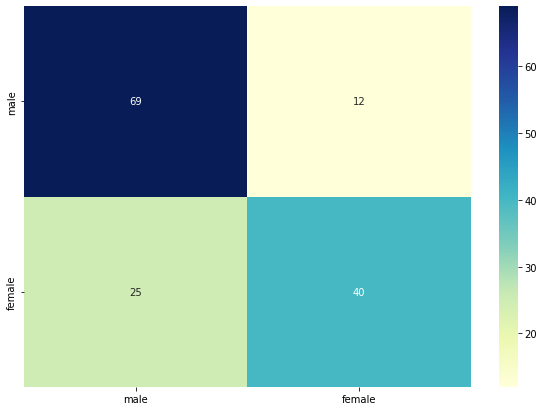

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(confusion_matrix(test_labels, preds), index = label_names,
                  columns = label_names)
plt.figure(figsize = (10,7))
# plt.xlabel("Model Predictions")
# plt.ylabel("Actual Labels")
sn.heatmap(df_cm, annot=True, cmap="YlGnBu")


### Distinguishing Words

In [20]:
import pandas as pd

tweets_train = pd.read_csv('data/tweets_prep_train.csv', usecols=["gender", "processed_text"])
tweets_train = tweets_train[tweets_train.processed_text.notna()]

In [7]:
import collections,itertools
from tqdm.auto import tqdm

def return_most_frequent(list_of_tweets):
    return collections.Counter(itertools.chain.from_iterable(x.split() for x in tqdm(list_of_tweets)))

In [21]:
class_names = tweets_train.gender.unique()
class2words = dict()

for class_name in class_names:
    class_tweets = tweets_train[tweets_train["gender"] == class_name]
    class_words_uni = return_most_frequent(class_tweets.processed_text)
    class_words_df =  pd.DataFrame.from_dict(dict(class_words_uni), orient="index", columns=["counts"])
    class_words_most_frequent = class_words_df[class_words_df.counts > 1000].index.to_list()
    class2words[class_name] = class_words_most_frequent

100%|██████████| 823413/823413 [00:03<00:00, 270883.85it/s]


In [22]:
class2distinctwords = dict()
all_distinct_wordsset = set()

for (class_name1, words1) in class2words.items():
    base_class_name = class_name1
    base_class_wordsset = set(words1)

    other_words = list()
    for (class_name2, words2) in class2words.items():
        if class_name2 != class_name1:
            other_words += words2

    other_wordsset = set(other_words)
    class_distinct_wordsset = base_class_wordsset - other_wordsset

    class2distinctwords[class_name1] = class_distinct_wordsset
    print(class_name1, len(base_class_wordsset), len(class_distinct_wordsset))

    all_distinct_wordsset = all_distinct_wordsset.union(class_distinct_wordsset)

print(len(all_distinct_wordsset))
with open(f"data/gender_specific_words.txt", encoding="utf-8" ,mode="w") as file:
    for item in all_distinct_wordsset:
        file.writelines(item)
        file.writelines("\n")

k 681 69
e 787 175
244


#### Uni-grams

In [ ]:
female_words_uni = return_most_frequent(female_tweets.processed_text)
male_words_uni = return_most_frequent(male_tweets.processed_text)

In [5]:
female_words_df =  pd.DataFrame.from_dict(dict(female_words_uni), orient="index", columns=["counts"])
male_words_df =  pd.DataFrame.from_dict(dict(male_words_uni), orient="index", columns=["counts"])

In [14]:
female_words_most_frequent = female_words_df[female_words_df.counts > 1000].index.to_list()
male_words_most_frequent = male_words_df[male_words_df.counts > 1000].index.to_list()

In [15]:
female_specific_words = set(female_words_most_frequent) - set(male_words_most_frequent)
male_specific_words = set(male_words_most_frequent) - set(female_words_most_frequent)

In [18]:
with open("female_specific_words.txt", encoding="utf-8" ,mode="w") as file:
    for item in female_specific_words:
        file.writelines(item)
        file.writelines("\n")

#### Bi-grams

In [126]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [127]:
vectorizer_female = TfidfVectorizer(ngram_range=(2, 2), max_df=0.7, min_df=3)
vectorizer_female.fit(female_tweets.text)

female_words_counts_matrix = vectorizer_female.transform(female_tweets.text)

tokens = vectorizer_female.get_feature_names()
counts = female_words_counts_matrix.sum(axis=0).tolist()[0]

female_word_counts = dict(zip(tokens, counts))

import operator
female_words = sorted(female_word_counts.items(),key=operator.itemgetter(1),reverse=True)

In [128]:
vectorizer_male = TfidfVectorizer(ngram_range=(2, 2), max_df=0.7, min_df=3)
vectorizer_male.fit(male_tweets.text)

male_words_counts_matrix = vectorizer_male.transform(male_tweets.text)

tokens = vectorizer_male.get_feature_names()
counts = male_words_counts_matrix.sum(axis=0).tolist()[0]

male_word_counts = dict(zip(tokens, counts))

import operator
male_words = sorted(male_word_counts.items(),key=operator.itemgetter(1),reverse=True)

In [113]:
female_words_df =  pd.DataFrame.from_dict(dict(female_words), orient="index", columns=["counts"])
male_words_df =  pd.DataFrame.from_dict(dict(male_words), orient="index", columns=["counts"])

In [144]:
female_words_most_frequent = female_words_df[female_words_df.counts > 3000].index.to_list()
male_words_most_frequent = male_words_df[male_words_df.counts > 4000].index.to_list()

In [145]:
set(female_words_most_frequent) - set(male_words_most_frequent)

{'13',
 '16',
 '17',
 '20 00',
 '2021',
 'acil',
 'are',
 'bak',
 'bir şey',
 'by',
 'canım',
 'covid',
 'dbdevletbahceli',
 'demek',
 'dünyanın',
 'eğitim',
 'film',
 'from',
 'genel başkanımız',
 'geri',
 'gerçek',
 'gerçekten',
 'grup',
 'gt',
 'guzel',
 'güzel bir',
 'hadi',
 'harika',
 'hayat',
 'hdp',
 'hdpgenelmerkezi',
 'icin',
 'insanlar',
 'istanbul',
 'it',
 'kadınlar',
 'kilicdarogluk',
 'kişi',
 'kötü',
 'lütfen',
 'mart',
 'me',
 'mhp',
 'my',
 'ne kadar',
 'olduğunu',
 'olsa',
 'oluyor',
 'onu',
 'repost',
 'rt dbdevletbahceli',
 'rt hdpgenelmerkezi',
 'rt kilicdarogluk',
 'sizi',
 'sizin',
 'su',
 'tesekkur',
 'tesekkurler',
 'this',
 'we',
 'ya da',
 'yani',
 'zor',
 'çok güzel',
 'çok teşekkür',
 'çünkü'}

In [146]:
set(male_words_most_frequent) - set(female_words_most_frequent)

{'2020',
 '25',
 'abd',
 'abi',
 'adam',
 'ahmet',
 'ak',
 'ak parti',
 'allah tan',
 'beşiktaş',
 'cuma',
 'cumhurbaşkanı',
 'eski',
 'fenerbahçe',
 'galatasaray',
 'haberturk',
 'ise',
 'kardeşim',
 'mehmet',
 'na',
 'prof',
 'prof dr',
 'tan rahmet',
 'tebrik',
 'temmuz',
 'turkey',
 'via',
 'yapılan',
 'yayın',
 'ziyaret',
 'üzere'}